# Sinus convolution test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate, signal

%matplotlib inline

In [2]:
path = '../data/old/'
data = pd.read_csv(path+'CarloAll.csv', ',')
data.head()

,Time,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,id,label
0,0.000000,3699.102539,3653.846191,3678.076904,3715.384522,3635.384522,3653.974365,3677.435791,3667.435791,3682.820557,3555.128174,3622.051270,3696.794922,3625.897461,3446.153809,0,0
1,0.007812,3782.307617,3741.281982,3754.615478,3808.461426,3674.230713,3729.358887,3750.512939,3738.846191,3755.000000,3639.230713,3708.974365,3781.410156,3693.718018,3530.897461,0,0
2,0.015625,3745.256348,3714.487061,3716.923096,3766.025635,3701.794922,3693.205078,3715.512939,3707.179443,3721.923096,3609.615478,3677.307617,3749.102539,3665.128174,3500.000000,0,0
3,0.023438,3728.205078,3696.794922,3701.794922,3759.743652,3692.820557,3674.871826,3697.435791,3689.871826,3705.384522,3591.410156,3661.794922,3731.153809,3643.974365,3483.974365,0,0
4,0.031250,3640.128174,3598.333252,3615.641113,3665.897461,3551.538574,3594.230713,3614.230713,3605.769287,3624.358887,3507.051270,3555.384522,3627.948730,3556.538574,3386.025635,0,0


/home/ateska/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


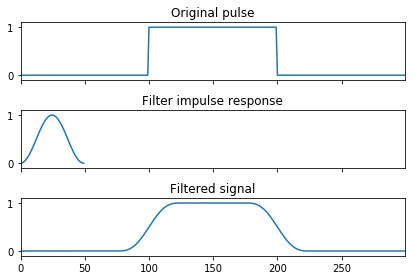

In [3]:
sig = np.repeat([0., 1., 0.], 100)
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)


fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

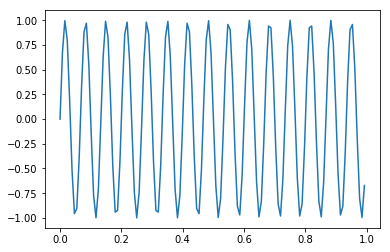

In [4]:
freq = 15
duration = 1
num_samples = 1000
sampling_rate = 128

# time = np.linspace(0,duration,num_samples)    
time = np.arange(start=0, stop=duration, step=1/sampling_rate)   
base_sin =  np.sin(2*np.pi*time*freq)
plt.plot(time, base_sin)

In [5]:
n_last = sampling_rate * 1
carlo_data = data.AF3
subset_carlo = carlo_data[:n_last]

In [7]:
len(subset_carlo)

128

In [8]:
len(base_sin)

128

In [6]:
stats.pearsonr(x=subset_carlo, y=base_sin)


(-0.055592402306082034, 0.5331080431638782)